In [53]:
import numpy as np
import networkx as nx
import scipy.linalg

In [13]:
"""A = { (1,2), [2,5], [5,3], [1,3], [2,3],
    [1,4], [4,1], [1,5], [5,1],
    [4,3], [3,4], [4,5], [5,4]
    }"""

'A = { (1,2), [2,5], [5,3], [1,3], [2,3],\n    [1,4], [4,1], [1,5], [5,1],\n    [4,3], [3,4], [4,5], [5,4]\n    }'

In [21]:
s = """A = { (1,2), [2,5], [5,3], [1,3], [2,3],
    [1,4], [4,1], [1,5], [5,1],
    [4,3], [3,4], [4,5], [5,4]
    }"""
s = s.replace('[', "(")
s = s.replace(']', ")")
s = s.replace('\n', " ")
s

'A = { (1,2), (2,5), (5,3), (1,3), (2,3),     (1,4), (4,1), (1,5), (5,1),     (4,3), (3,4), (4,5), (5,4)     }'

In [27]:
A = { (1,2), (2,5), (5,3), (1,3), (2,3),     (1,4), (4,1), (1,5), (5,1),     (4,3), (3,4), (4,5), (5,4)     }

In [61]:
n = 5
G = np.zeros((5,5)) #use * will cause change of other
#print(G)
for i in range(5):
    for j in range(5):
        if((i+1,j+1) in A):
            G[j][i] = 1
            print(i,j)
print(G)

0 1
0 2
0 3
0 4
1 2
1 4
2 3
3 0
3 2
3 4
4 0
4 2
4 3
[[0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]


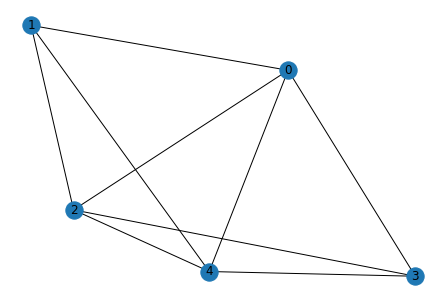

In [51]:
Gx = nx.Graph(G)
nx.draw(Gx, with_labels=True)

In [52]:
G = G/np.sum(G,axis=0)
G

array([[0.        , 0.        , 0.        , 0.33333333, 0.33333333],
       [0.25      , 0.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.5       , 0.        , 0.33333333, 0.33333333],
       [0.25      , 0.        , 1.        , 0.        , 0.33333333],
       [0.25      , 0.5       , 0.        , 0.33333333, 0.        ]])

In [55]:
R = np.ones((n,n))/np.sum(R,axis=0)
R

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [57]:
damping_constant = 0.85
W = damping_constant*G + (1-damping_constant)*R
W

array([[0.03      , 0.03      , 0.03      , 0.31333333, 0.31333333],
       [0.2425    , 0.03      , 0.03      , 0.03      , 0.03      ],
       [0.2425    , 0.455     , 0.03      , 0.31333333, 0.31333333],
       [0.2425    , 0.03      , 0.88      , 0.03      , 0.31333333],
       [0.2425    , 0.455     , 0.03      , 0.31333333, 0.03      ]])

In [60]:
scipy.linalg.null_space(W-np.eye(5))

array([[0.36201513],
       [0.13867824],
       [0.4978816 ],
       [0.67179951],
       [0.38795969]])